# Лабораторная работа №2

## Предельные циклы. Теория индексов.

<span style="font-style:normal; font-size:12pt;"> 
    <p>   С помощью критерия Бенедиксона и теории индекса обсудить возможность возникновения предельных циклов в следующих динамических системах. </p> 
 
    
$$
\begin{cases}
\dot{x} = a - y - bx + xy^{2}, \\
\dot{y} = bx - xy \\
\end{cases}
$$



In [77]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

### Ход работы

<span style="font-style:normal; font-size:12pt;"> 
    <p>
    1. Воспользуемся критерием Бенедиксона для определения зон, в которых не могут существовать замкнутые траектории:
    </p>
    
>$$
\begin{equation}
f(x, y) = a - y - bx + xy^{2}, \\
g(x, y) = bx - xy \\
\end{equation}
$$
>       
>$$
\begin{equation}
\frac{\partial{f}}{\partial{x}} = -b + y^{2}, \\
\frac{\partial{g}}{\partial{y}} = -x \\
\end{equation}
$$
>   
>$$
\begin{equation}
\frac{\partial{f}}{\partial{x}} + \frac{\partial{g}}{\partial{y}} = y^{2} -x -b  \\
\end{equation}
$$
>    
>$$
\begin{equation}
y^{2} -x -b = 0, \\
y^{2} = x + b \\
\end{equation}
$$
>
><span style="font-style:normal; font-size:12pt;"> 
    <p>
        Граница областей - парабола со смещением вдоль оси x
    </p>

<span style="font-style:normal; font-size:12pt;"> 
    <p>
    2. Найдем стационарные точки и определим их тип.
    </p>
    
>   <p>
    Стационарные точки можно найти аналитически, приравняв правые части системы к нулю и решив относительно двух неизвестных x и y:
    </p>
>
>$$
\left[ 
\begin{gathered} 
    \begin{cases}
    x = 0 \\
    y = a \\
    \end{cases} \\
    \begin{cases}
    x = \frac{b-a}{b(b-1)} \\
    y = b \\
    \end{cases}
\end{gathered} 
\right. \\
$$
>
><span style="font-style:normal; font-size:12pt;"> 
    <p></p>
    <p>
    a и b - параметры. Примем для определенности a = 1, b = 5
    </p>

In [78]:
a = 1
b = 5

In [81]:
x1 = 0
y1 = 1

x2 = 1 / 5
y2 = 5

In [82]:
y_plot = np.linspace(-5, 5, 100)
x_plot = [y**2 - b for y in y_plot]

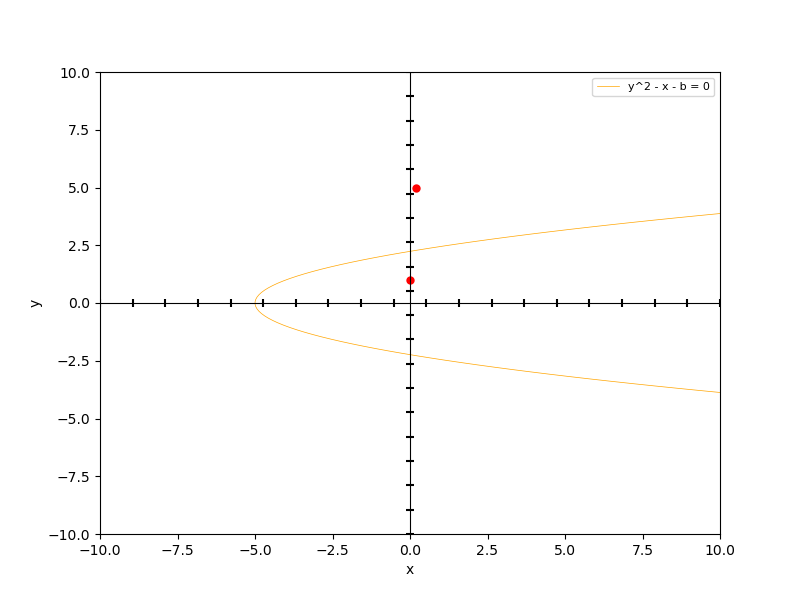

In [98]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_plot, y_plot, color="orange", linewidth=0.5, label="y^2 - x - b = 0")
plt.axvline(x=0, linewidth=0.8, color="black")
plt.axhline(y=0, linewidth=0.8, color="black")

ax.scatter(np.linspace(-10, 10, 20), np.zeros(20), color="black", marker='|')
ax.scatter(np.zeros(20), np.linspace(-10, 10, 20), color="black", marker='_')

ax.scatter(x1, y1, color="red", linewidth=0.01)
ax.scatter(x2, y2, color="red", linewidth=0.01)


plt.xlim(-10, 10)
plt.ylim(-10, 10)

ax.set_xlabel("x")
ax.set_ylabel("y")

# plt.title()
plt.legend(fontsize=8)
plt.show()

<span style="font-style:normal; font-size:12pt;"> 
    <p>
    Линеаризация системы:
    </p>

<span style="font-style:normal; font-size:12pt;"> 
    <p>
    Тип точек и их индекс
    </p>

<span style="font-style:normal; font-size:12pt;"> 
    <p>
    Области предельных циклов
    </p> 